EDA on Gym members

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df=pd.read_csv('gym_members_exercise_tracking.csv')
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [4]:
df.shape

(973, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [6]:
le=LabelEncoder()
for col in df.columns[df.dtypes=='object']:
    df[f'{col}_encoded']=le.fit_transform(df[col])

In [8]:
df_n=df.drop(columns=['Gender','Workout_Type'])

In [10]:
df_n.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_encoded,Workout_Type_encoded
0,56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,1,3
1,46,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,0,1
2,32,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,0,0
3,25,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,1,2
4,38,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,1,2


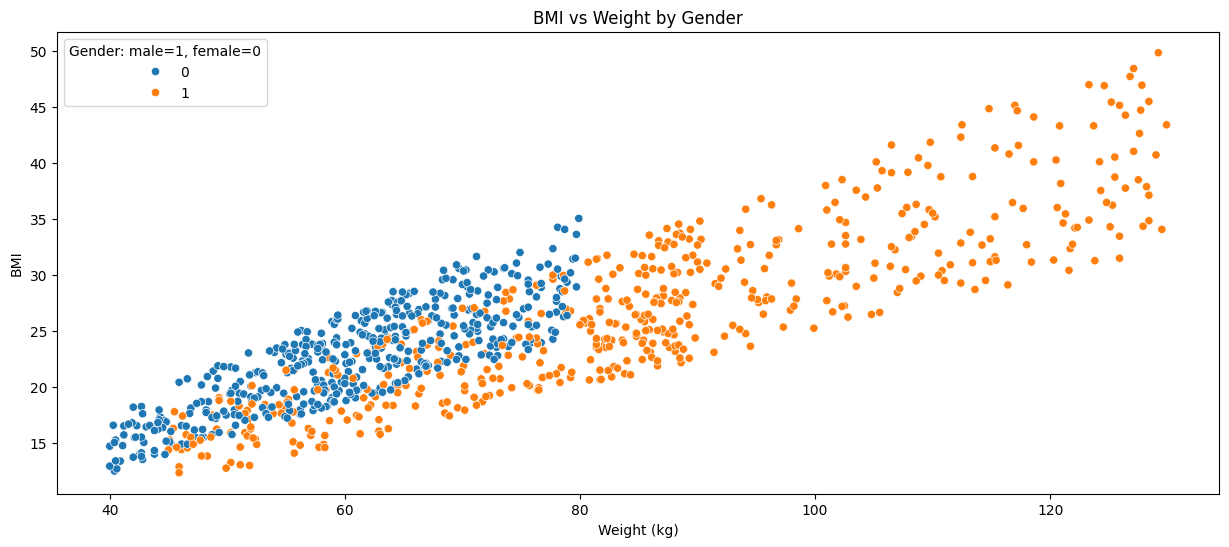

In [21]:



plt.figure(figsize=(15,6))
sns.scatterplot(data=df,x='Weight (kg)',y='BMI',hue='Gender_encoded')
plt.legend(title='Gender: male=1, female=0')
plt.title('BMI vs Weight by Gender')
plt.show()

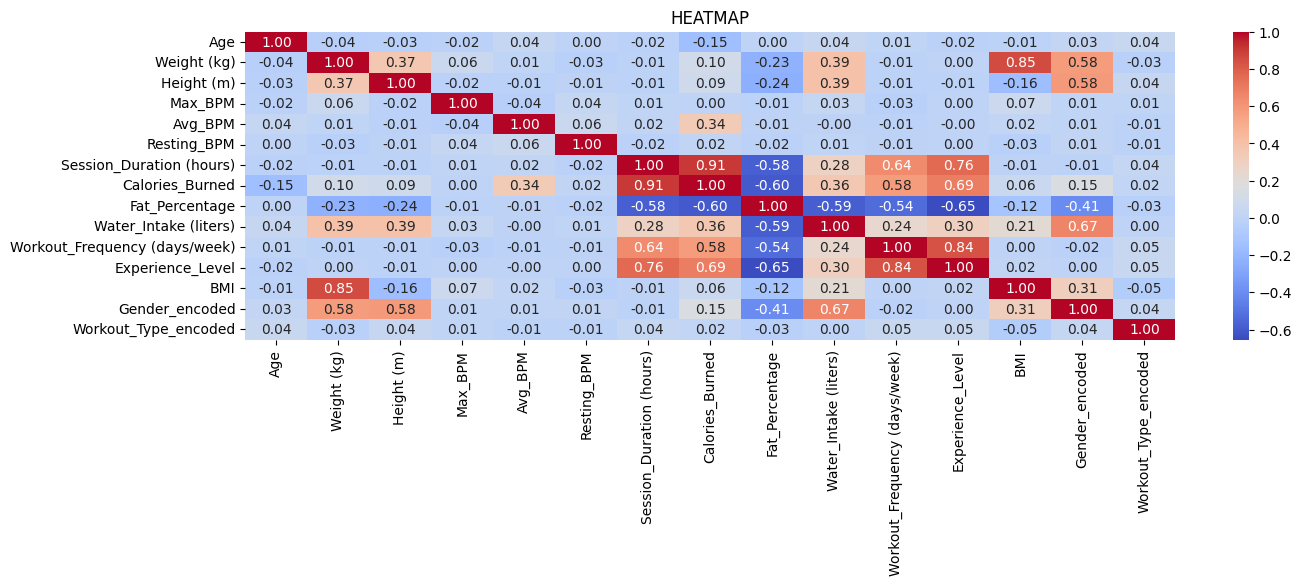

In [29]:
corr=df_n.corr()
plt.figure(figsize=(15,4))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('HEATMAP')
plt.show()

In [30]:
df_n.columns

Index(['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level', 'BMI', 'Gender_encoded', 'Workout_Type_encoded'],
      dtype='object')

<Figure size 1600x400 with 0 Axes>

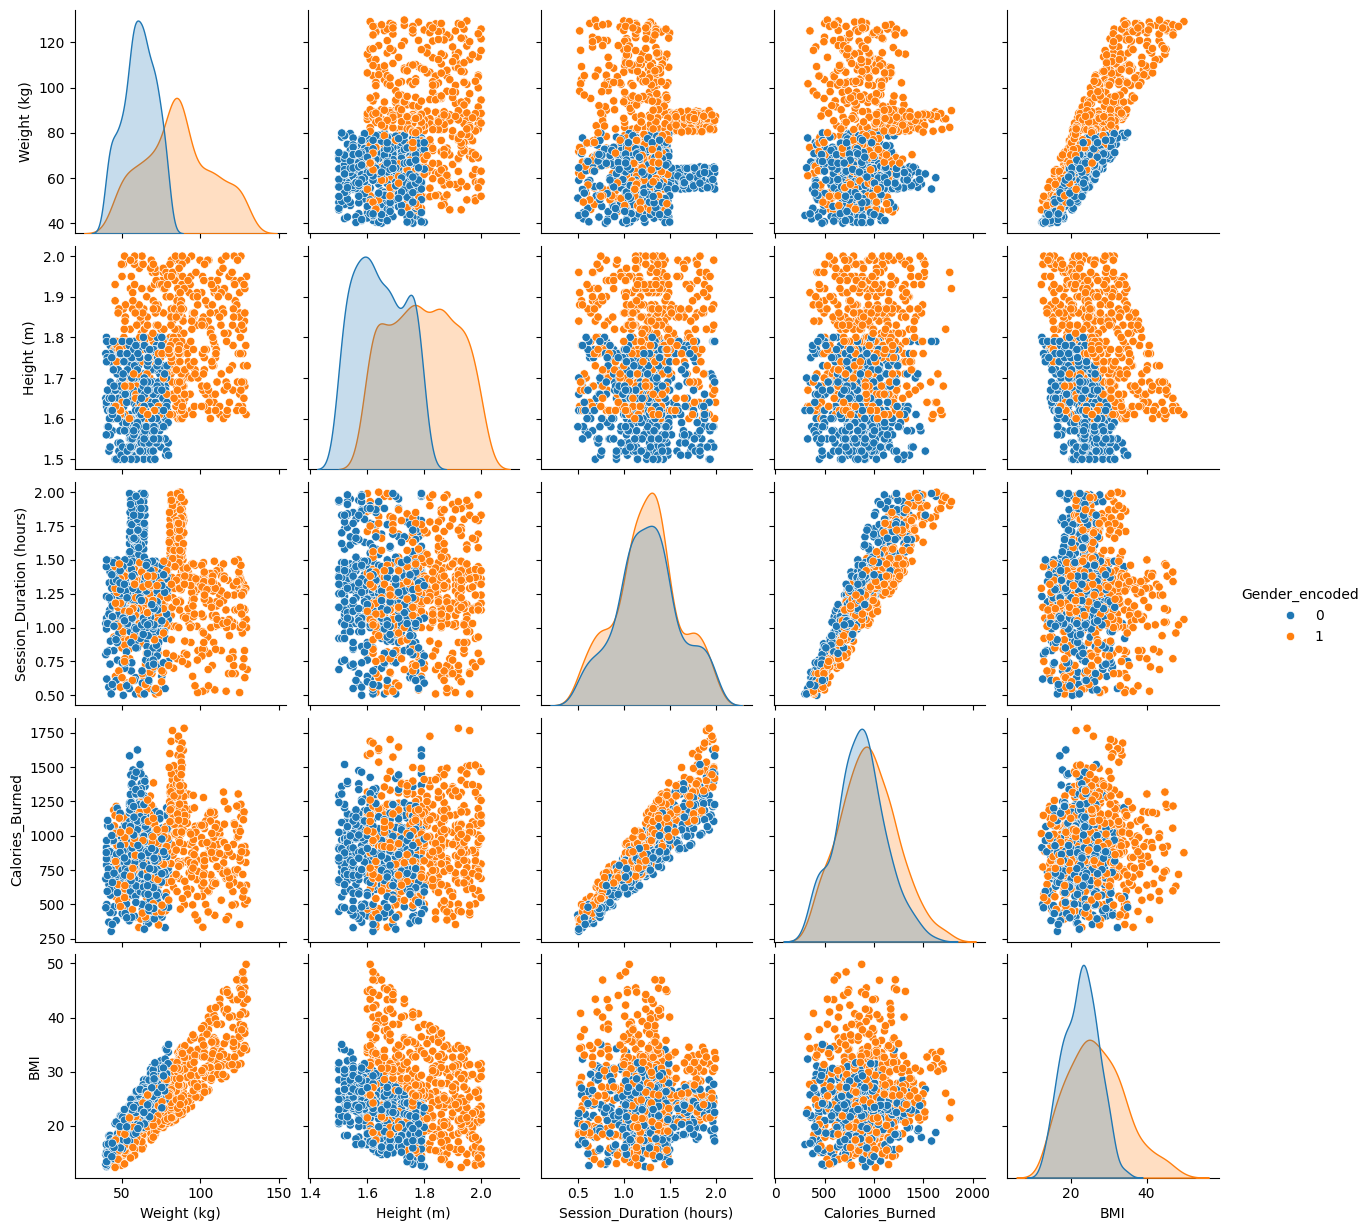

In [33]:
plt.figure(figsize=(16,4))
sns.pairplot(df_n[[ 'Weight (kg)', 'Height (m)', 
       'Session_Duration (hours)', 'Calories_Burned', 
        'Gender_encoded','BMI' ]],hue='Gender_encoded')
plt.show()

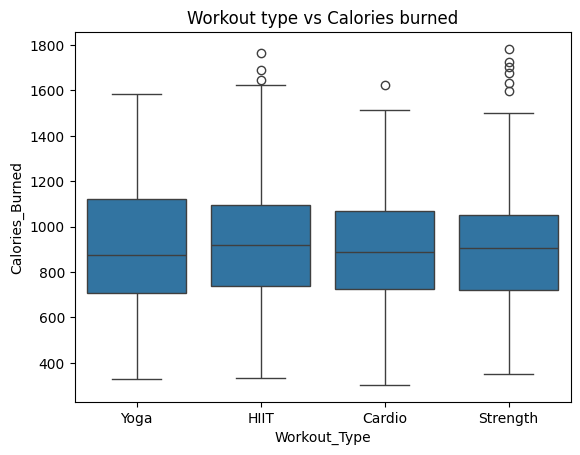

In [34]:
sns.boxplot(x='Workout_Type',y='Calories_Burned',data=df)
plt.title('Workout type vs Calories burned')
plt.show()

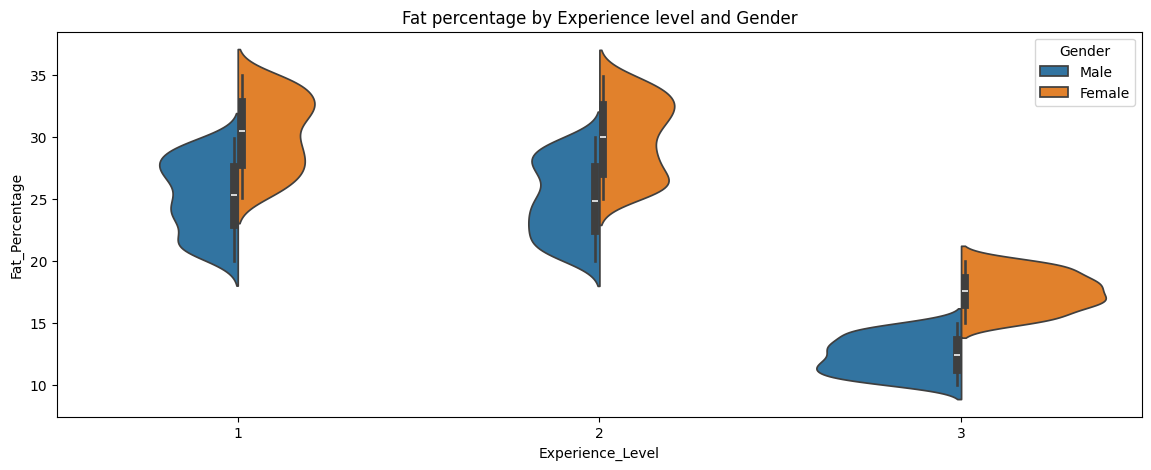

In [38]:
plt.figure(figsize=(14,5))
sns.violinplot(x='Experience_Level',y='Fat_Percentage',hue='Gender',data=df,split=True)
plt.title('Fat percentage by Experience level and Gender')
plt.show()

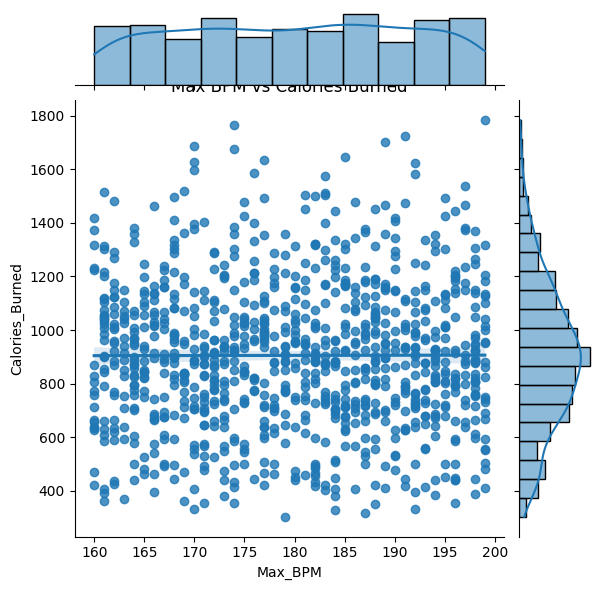

In [42]:
sns.jointplot(x='Max_BPM',y='Calories_Burned',data=df,kind='reg')
plt.title('Max BPM vs Calories Burned')
plt.show()